In [3]:
import cv2
import imageio as io
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Used device: {DEVICE}")

%matplotlib inline

Used device: cuda


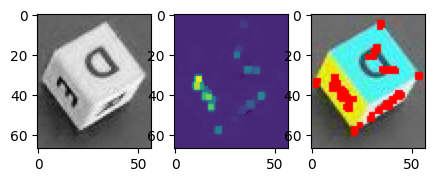

In [11]:
IMG_PATH = "../data/query_img1.jpg"
img = io.v3.imread(IMG_PATH)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
harris_corners = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)
threshold = 0.01 * harris_corners.max()
img[harris_corners > threshold] = [255, 0, 0]

fig, axes = plt.subplots(1, 3, figsize=(5, 5))
axes[0].imshow(gray, cmap='gray')
axes[1].imshow(harris_corners)
axes[-1].imshow(img)
plt.axis('on')
plt.show()